In [1]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [2]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [3]:
def model(t_u, w, b):
    return w * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs =0.5*(t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
params = torch.tensor([1.0,0], requires_grad=True)

#### ![FP%7B9WQ6~%25TL95W%5D%28TQXUIB4.png#pic_left](attachment:FP%7B9WQ6~%25TL95W%5D%28TQXUIB4.png )

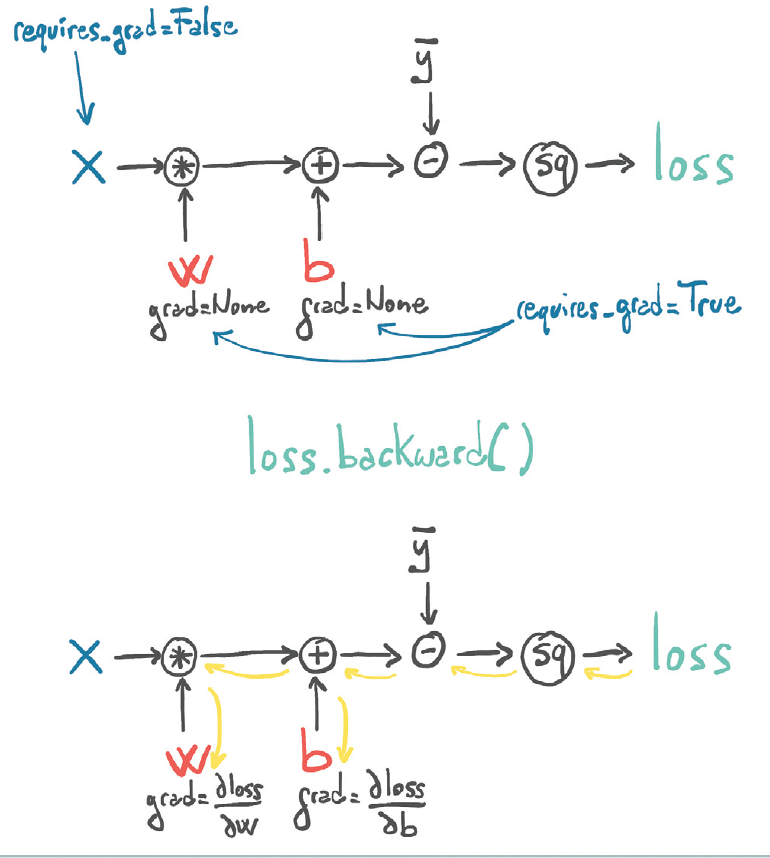

In [24]:
params.grad is None

False

In [23]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad       # The grad attribute of params contains the derivatives of the loss with
                  #respect to each element of params

tensor([14089.7373,   248.2236])

In [8]:
# zero the gradient explicitly at each iteration
if params.grad is not None:
    params.grad.zero_()  

#### NOTE: You might be curious why zeroing the gradient is a required step instead of zeroing happening automatically whenever we call backward. Doing it this way provides more flexibility and control when working with gradients in complicated models.

In [9]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [12]:
params=training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss 7.226823
Epoch 1000, Loss 3.927648
Epoch 1500, Loss 2.517169
Epoch 2000, Loss 1.914156
Epoch 2500, Loss 1.656352
Epoch 3000, Loss 1.546134
Epoch 3500, Loss 1.499013
Epoch 4000, Loss 1.478868
Epoch 4500, Loss 1.470254
Epoch 5000, Loss 1.466573


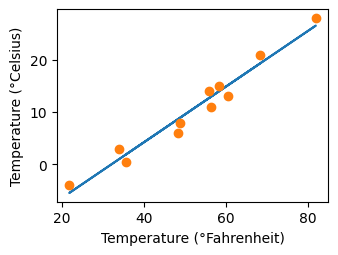

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # <1>

fig = plt.figure(figsize=(3.5, 2.5))
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip